# Car Sales Analysis

### Importing What We Need

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

df =  pd.read_csv("cars.csv")
pd.set_option('display.max_columns', None)

In [224]:
# Exploring The Data 
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [225]:
df.shape

(204, 26)

In [226]:
# Assign Column Headers 
headers = ["symboling", "normalized-losses", "make", 
           "fuel-type", "aspiration","num-of-doors",
           "body-style","drive-wheels", "engine-location",
           "wheel-base","length", "width","height", "curb-weight",
           "engine-type","num-of-cylinders", "engine-size", 
           "fuel-system","bore","stroke", "compression-ratio",
           "horsepower", "peak-rpm","city-mpg","highway-mpg","price"]

df.columns=headers

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


### Data Preprocessing

In [227]:
# Replace any '?' into null
df.replace("?", pd.NA, inplace=True)

In [228]:
# Since fuel consumption is measured differently in different regions,
#  we convert miles per gallon (MPG) to liters per 100 kilometers (L/100km)

df['city-mpg'] = 235 / df['city-mpg']
df.rename(columns = {'city-mpg': "citykm"}, inplace=True)

df['highway-mpg'] = 235 / df['highway-mpg']
df.rename(columns = {'highway-mpg': "highway_km"}, inplace=True)
print(df.columns)

df.dtypes

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'citykm', 'highway_km',
       'price'],
      dtype='object')


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
citykm               float64
highway_km           float64
price                 object
dtype: object

In [229]:
# Convert to numeric
numeric_cols = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [230]:
# Checking For Missing Values 
df.isna().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
citykm                0
highway_km            0
price                 4
dtype: int64

In [231]:
# Fill missing numeric values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

In [232]:
# Checking For Duplicated Data
print("Duplicated data are " ,df.duplicated().sum())


Duplicated data are  0


In [233]:
df[df['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,citykm,highway_km,price
26,1,148.0,dodge,gas,turbo,<NA>,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,9.791667,7.833333,8558.0
62,0,122.0,mazda,diesel,std,<NA>,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,6.527778,5.595238,10795.0


In [237]:
df = df.dropna(subset=["num-of-doors"])
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
citykm               0
highway_km           0
price                0
dtype: int64

In [238]:
# Clean and convert categorical numerics
df["num-of-doors"].replace({"four": 4, "two": 2}, inplace=True)
df["num-of-cylinders"].replace({
    "two": 2, "three": 3, "four": 4, "five": 5,
    "six": 6, "eight": 8, "twelve": 12
}, inplace=True)
df["num-of-doors"] = pd.to_numeric(df["num-of-doors"], errors='coerce')
df["num-of-cylinders"] = pd.to_numeric(df["num-of-cylinders"], errors='coerce')


/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/4202075529.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["num-of-doors"].replace({"four": 4, "two": 2}, inplace=True)
/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/4202075529.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_dow

In [239]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,citykm,highway_km,price
0,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0
1,1,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0
2,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0
3,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0
4,2,122.0,audi,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,12.368421,9.400000,15250.0


In [240]:
# Checking The Data Types Also Show The Null Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  202 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       202 non-null    int64  
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    int64  
 16  engine-size        202 non-null

### EDA & Data Visualization

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/2163599482.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['length']/df['length'].max()
/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/2163599482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['width'] = df['width']/df['width'].max()
/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/2163599482.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

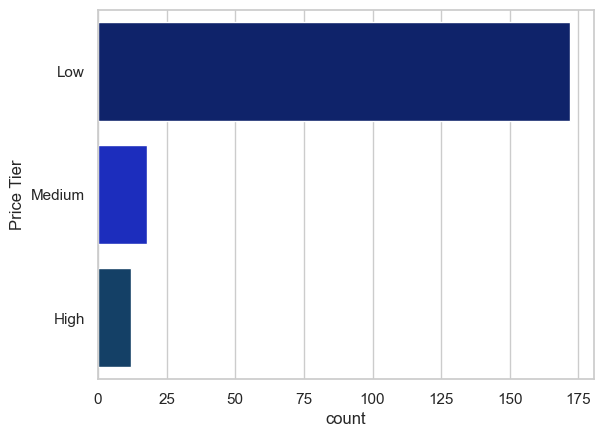

In [ ]:
# Distribution of Cars by Price Tier
# To ensure fair comparisons between different features, we normalize numerical columns.
#  To categorize cars based on their price
#  we divide the price range into three categories: Low, Medium and High

df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

colors = [ '#001B79',
    '#0118D8',
    '#074173',
    '#0F67B1',
    '#3559E0',
    '#1B6B93',
    '#006BFF',
    '#3876BF',
    '#0D92F4',
    '#39A7FF',
    '#80B3FF',
    '#75C2F6',
    '#68D2E8' ]
# binning- grouping values
bins = np.linspace(min(df['price']), max(df['price']), 4) 
group_names = ['Low', 'Medium', 'High']
df['price-binned'] = pd.cut(df['price'], bins, 
                              labels = group_names, 
                              include_lowest = True)

plt.ylabel("Price Tier")
sns.countplot(df["price-binned"], palette=colors)
plt.show()

**Insight:** Most cars fall into the low price range, indicating a market focus on low-tier vehicles.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/1447191946.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df["price"], kde=True, bins=20, palette=colors)


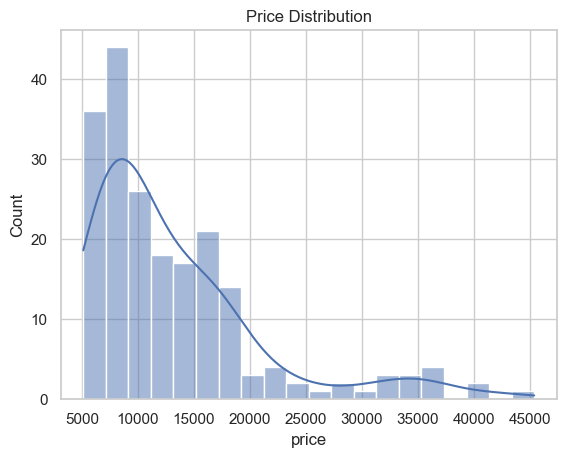

In [ ]:
#  Price Distribution
sns.histplot(df["price"], kde=True, bins=20, palette=colors)
plt.title("Price Distribution")
plt.show()


**Insight:** Car prices are right-skewed, with a few expensive cars pulling the average upward.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/3396175786.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df["horsepower"], kde=True, bins=20, palette=colors)


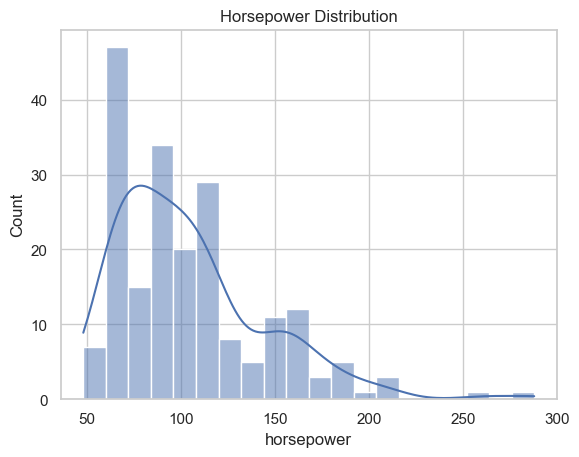

In [ ]:
sns.histplot(df["horsepower"], kde=True, bins=20, palette=colors)
plt.title("Horsepower Distribution")
plt.show()

**Insight:** Most cars have horsepower in the low to mid-range, suitable for city driving.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/4145197734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="body-style", y="price", palette=colors)
/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/4145197734.py:3: UserWarning: The palette list has more values (13) than needed (5), which may not be intended.
  sns.boxplot(data=df, x="body-style", y="price", palette=colors)


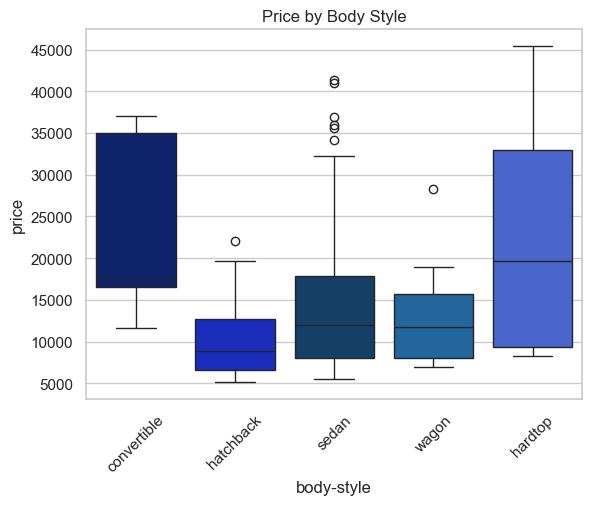

In [ ]:
sns.boxplot(data=df, x="body-style", y="price", palette=colors)
plt.title("Price by Body Style")
plt.tick_params(axis='x', rotation=45)
plt.show()

**Insight:** Convertibles and hardtops are generally more expensive, possibly due to luxury features.

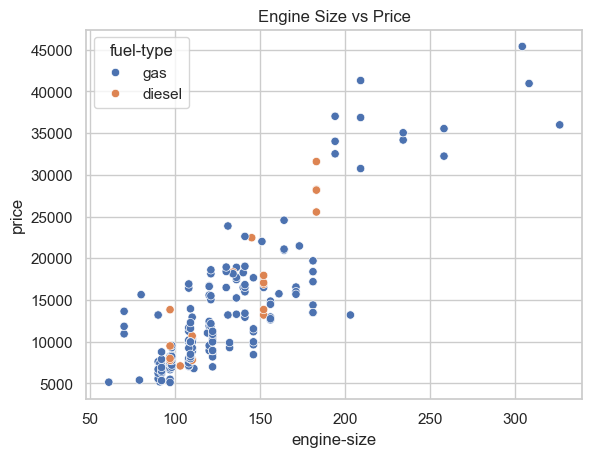

In [ ]:
sns.scatterplot(data=df, x="engine-size", y="price", hue="fuel-type")
plt.title("Engine Size vs Price")
plt.show()

**Insight:** A positive correlation exists: as engine size increases, the price tends to rise.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/3845556731.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_dw, x="drive-wheels", y="price", palette=colors)
/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/3845556731.py:3: UserWarning: The palette list has more values (13) than needed (3), which may not be intended.
  sns.barplot(data=avg_price_dw, x="drive-wheels", y="price", palette=colors)


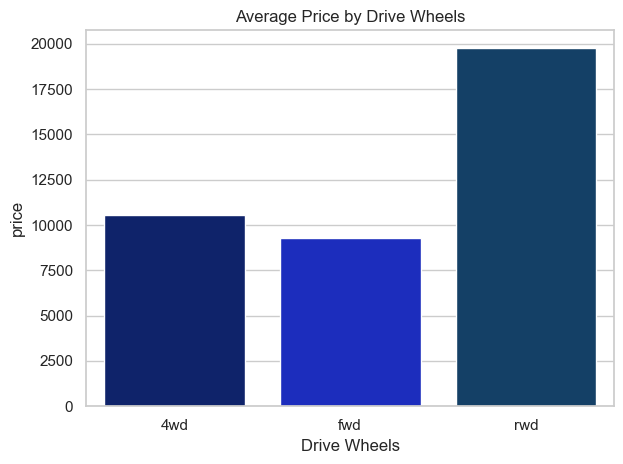

In [ ]:
avg_price_dw = df.groupby("drive-wheels")["price"].mean().reset_index()
sns.barplot(data=avg_price_dw, x="drive-wheels", y="price", palette=colors)
plt.title("Average Price by Drive Wheels")
plt.xlabel("Drive Wheels")
plt.tight_layout()
plt.show()


**Insight:** Rear-wheel drive cars tend to be more expensive, likely due to performance advantages.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/3867714167.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="drive-wheels", y='horsepower', palette=colors)
/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/3867714167.py:1: UserWarning: The palette list has more values (13) than needed (3), which may not be intended.
  sns.barplot(data=df, x="drive-wheels", y='horsepower', palette=colors)


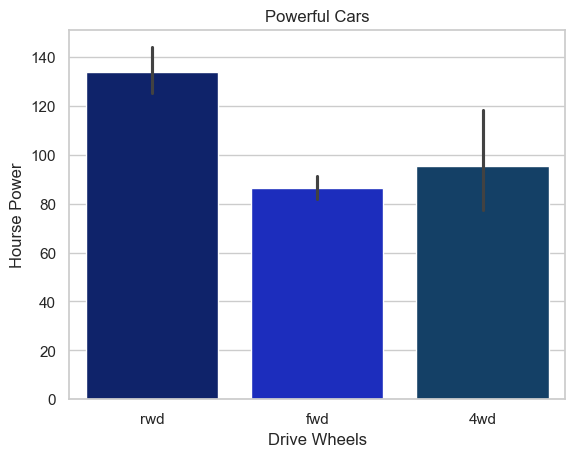

In [247]:
sns.barplot(data=df, x="drive-wheels", y='horsepower', palette=colors)
plt.title('Powerful Cars')
plt.xlabel('Drive Wheels')
plt.ylabel('Hourse Power')
plt.show()


**Insight:** Rear-wheel drive vehicles also tend to have more horsepower, supporting performance claims.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/3675202040.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="make", y="price", data=rwd_price_by_brand, palette=colors)


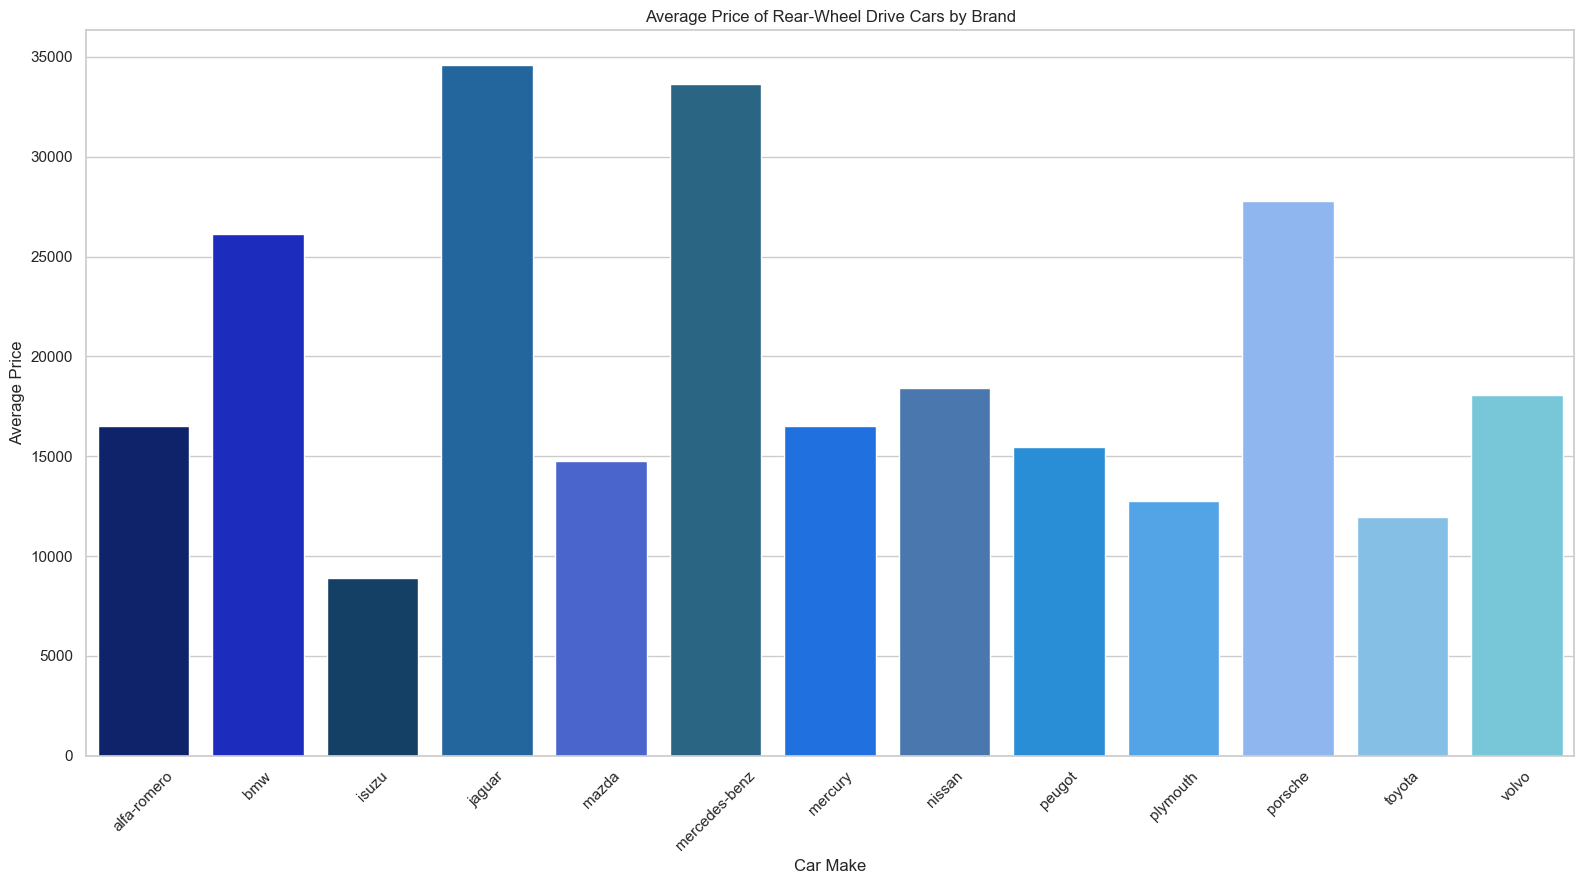

In [248]:
plt.figure(figsize=(16,9))
rwd_cars = df[df["drive-wheels"] == "rwd"]
rwd_price_by_brand = rwd_cars.groupby("make")["price"].mean().reset_index()
sns.barplot(x="make", y="price", data=rwd_price_by_brand, palette=colors)
plt.title("Average Price of Rear-Wheel Drive Cars by Brand")
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.xlabel("Car Make")
plt.tight_layout()
plt.show()

**Insight:** Luxury brands dominate the higher end of rear-wheel drive car prices.

In [257]:
# Getting Top 5 Brands in Gas Saving

save_gas = df.sort_values("citykm").head(5)

save_gas[["make", "fuel-type", "body-style", "citykm", "highway_km", "price","drive-wheels"]]

,make,fuel-type,body-style,citykm,highway_km,price,drive-wheels
29,honda,gas,hatchback,4.795918,4.351852,6479.00,fwd
17,chevrolet,gas,hatchback,5.000000,4.433962,5151.00,fwd
89,nissan,diesel,sedan,5.222222,4.700000,7099.00,fwd
43,isuzu,gas,sedan,6.184211,5.465116,13205.69,fwd
31,honda,gas,hatchback,6.184211,5.595238,5399.00,fwd


**Insight:** These brands are best for city fuel economy – ideal for urban commuters.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/3082805423.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_fuel_by_engine, x='engine-type', y='citykm' ,palette=colors)
/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/3082805423.py:8: UserWarning: The palette list has more values (13) than needed (5), which may not be intended.
  sns.barplot(data=top5_fuel_by_engine, x='engine-type', y='citykm' ,palette=colors)


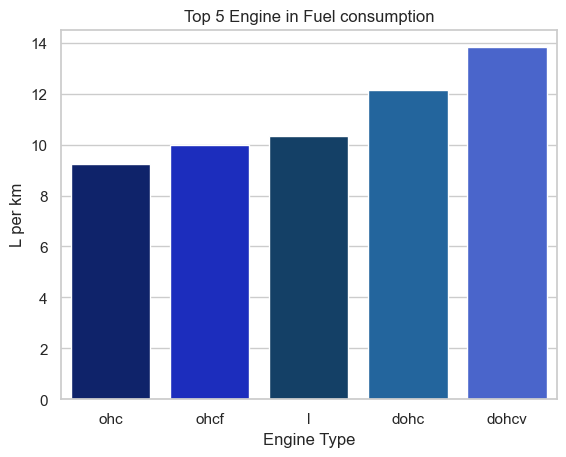

In [272]:
# Group by engine-type and calculate average city-mpg
fuel_by_engine = df.groupby('engine-type')['citykm'].mean().reset_index()

# Sort by city-mpg descending and take top 5
top5_fuel_by_engine = fuel_by_engine.sort_values("citykm", ascending=True).head(5)


sns.barplot(data=top5_fuel_by_engine, x='engine-type', y='citykm' ,palette=colors)
plt.title('Top 5 Engine in Fuel consumption')
plt.xlabel('Engine Type')
plt.ylabel('L per km')
plt.show()

**Insight:** Certain engine types like OHC or OHCF provide better city fuel economy.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/2857544153.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="fuel-system", y="citykm", data=top5_fuel_systems, palette=colors)
/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_19825/2857544153.py:9: UserWarning: The palette list has more values (13) than needed (5), which may not be intended.
  sns.barplot(x="fuel-system", y="citykm", data=top5_fuel_systems, palette=colors)


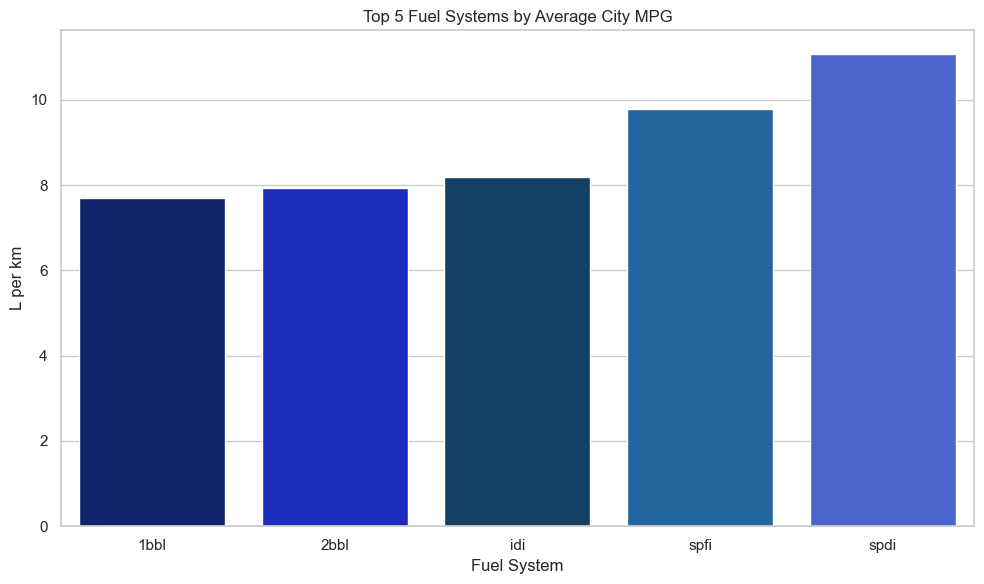

In [273]:
# Group by fuel-system and calculate average city-mpg
fuel_efficiency = df.groupby("fuel-system")["citykm"].mean().reset_index()

# Sort descending to get the best (most efficient)
top5_fuel_systems = fuel_efficiency.sort_values("citykm", ascending=True).head(5)


plt.figure(figsize=(10, 6))
sns.barplot(x="fuel-system", y="citykm", data=top5_fuel_systems, palette=colors)
plt.title("Top 5 Fuel Systems by Average City MPG")
plt.xlabel("Fuel System")
plt.ylabel("L per km")
plt.tight_layout()
plt.show()

**Insight:** Fuel systems play a major role in fuel consumption. 1bbl systems tend to perform better.

In [268]:
df.to_csv('Updated_cars.csv')